In [44]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams

In [45]:
df = pd.read_excel("doc_demos/Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [46]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [47]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount']
furniture.drop(cols, axis=1, inplace=True)
furniture

,Order Date,Sales,Profit
0,2016-11-08,261.9600,41.9136
1,2016-11-08,731.9400,219.5820
3,2015-10-11,957.5775,-383.0310
5,2014-06-09,48.8600,14.1694
10,2014-06-09,1706.1840,85.3092
...,...,...,...
9962,2015-03-19,383.4656,-67.6704
9964,2016-12-05,13.4000,6.4320
9980,2015-09-06,85.9800,22.3548
9989,2014-01-21,25.2480,4.1028


In [48]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales,Profit
7474,2014-01-06,2573.820,746.4078
7660,2014-01-07,76.728,-53.7096
866,2014-01-10,51.940,21.2954
716,2014-01-11,9.940,3.0814
2978,2014-01-13,545.940,87.3504
...,...,...,...
7636,2017-12-29,258.750,77.6250
7632,2017-12-29,1207.840,314.0384
5131,2017-12-29,101.120,37.4144
7635,2017-12-29,300.980,87.2842


In [49]:
furniture = furniture.groupby('Order Date')['Profit'].sum().reset_index()
furniture

,Order Date,Profit
0,2014-01-06,746.4078
1,2014-01-07,-53.7096
2,2014-01-10,21.2954
3,2014-01-11,3.0814
4,2014-01-13,91.2798
...,...,...
884,2017-12-24,222.9092
885,2017-12-25,-7.0763
886,2017-12-28,-49.6680
887,2017-12-29,492.6236


In [50]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [51]:
y = furniture['Profit'].resample('MS').mean()
y

Order Date
2014-01-01     61.958962
2014-02-01     24.138340
2014-03-01    -66.391471
2014-04-01     39.598579
2014-05-01    -21.867350
2014-06-01     31.385016
2014-07-01     20.791483
2014-08-01     41.466981
2014-09-01     77.441567
2014-10-01     15.572781
2014-11-01    -13.540718
2014-12-01    100.590990
2015-01-01   -251.183333
2015-02-01     65.815800
2015-03-01     90.941081
2015-04-01     26.050015
2015-05-01     60.038980
2015-06-01    -22.925539
2015-07-01    -17.110200
2015-08-01    -30.466931
2015-09-01     71.058868
2015-10-01    -31.869279
2015-11-01    124.667667
2015-12-01     19.491550
2016-01-01     20.264047
2016-02-01     34.275927
2016-03-01    -26.441333
2016-04-01     19.201758
2016-05-01     82.930632
2016-06-01     -6.641656
2016-07-01     61.112194
2016-08-01    -29.067394
2016-09-01     29.275104
2016-10-01     -7.613684
2016-11-01     32.792352
2016-12-01    108.795058
2017-01-01     -2.629347
2017-02-01    -15.310931
2017-03-01     50.042660
2017-04-01    

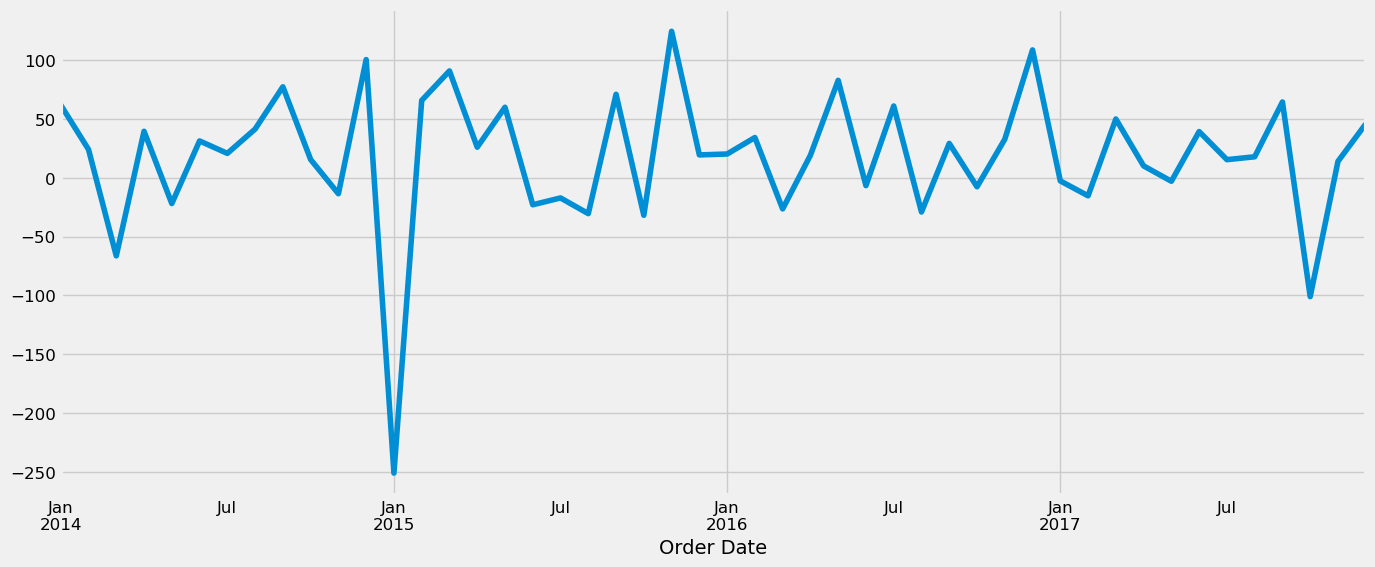

In [52]:
y.plot(figsize=(15, 6))
plt.show()

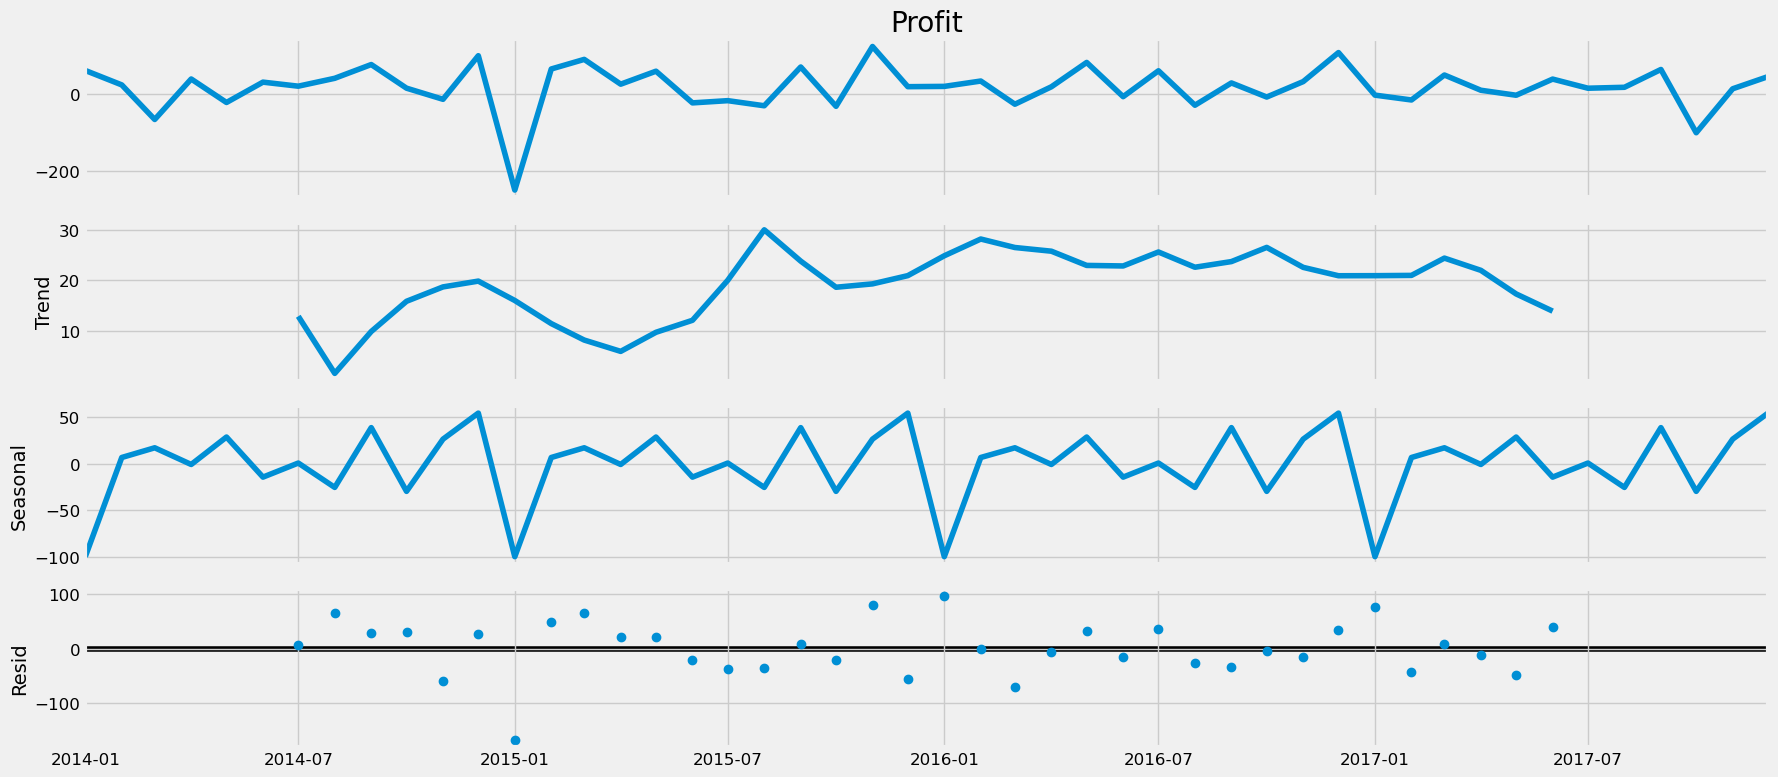

In [53]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [54]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
results

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:523.1706205585396
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1371.3938245559102
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.7629219834047
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:245.37292517517884
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:407.0038532643428
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1128.0913219176737
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:262.85960560776346
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:248.8504257264365
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:512.3948944514054
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2507.248093418276
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:393.53433366465293
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:236.9958231602961
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:408.08323729365617
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2550.485421370589
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:264.64461731911
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:238.99403600200938
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:554.9149492574671
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1342.8000100679571
ARIM

In [62]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1691      0.174     -0.970      0.332      -0.511       0.172
ma.L1         -1.0000   8935.305     -0.000      1.000   -1.75e+04    1.75e+04
ar.S.L12      -0.4049      0.142     -2.846      0.004      -0.684      -0.126
ma.S.L12      -1.0000   8935.436     -0.000      1.000   -1.75e+04    1.75e+04
sigma2      2325.4746      3.744    621.061      0.000    2318.136    2332.813


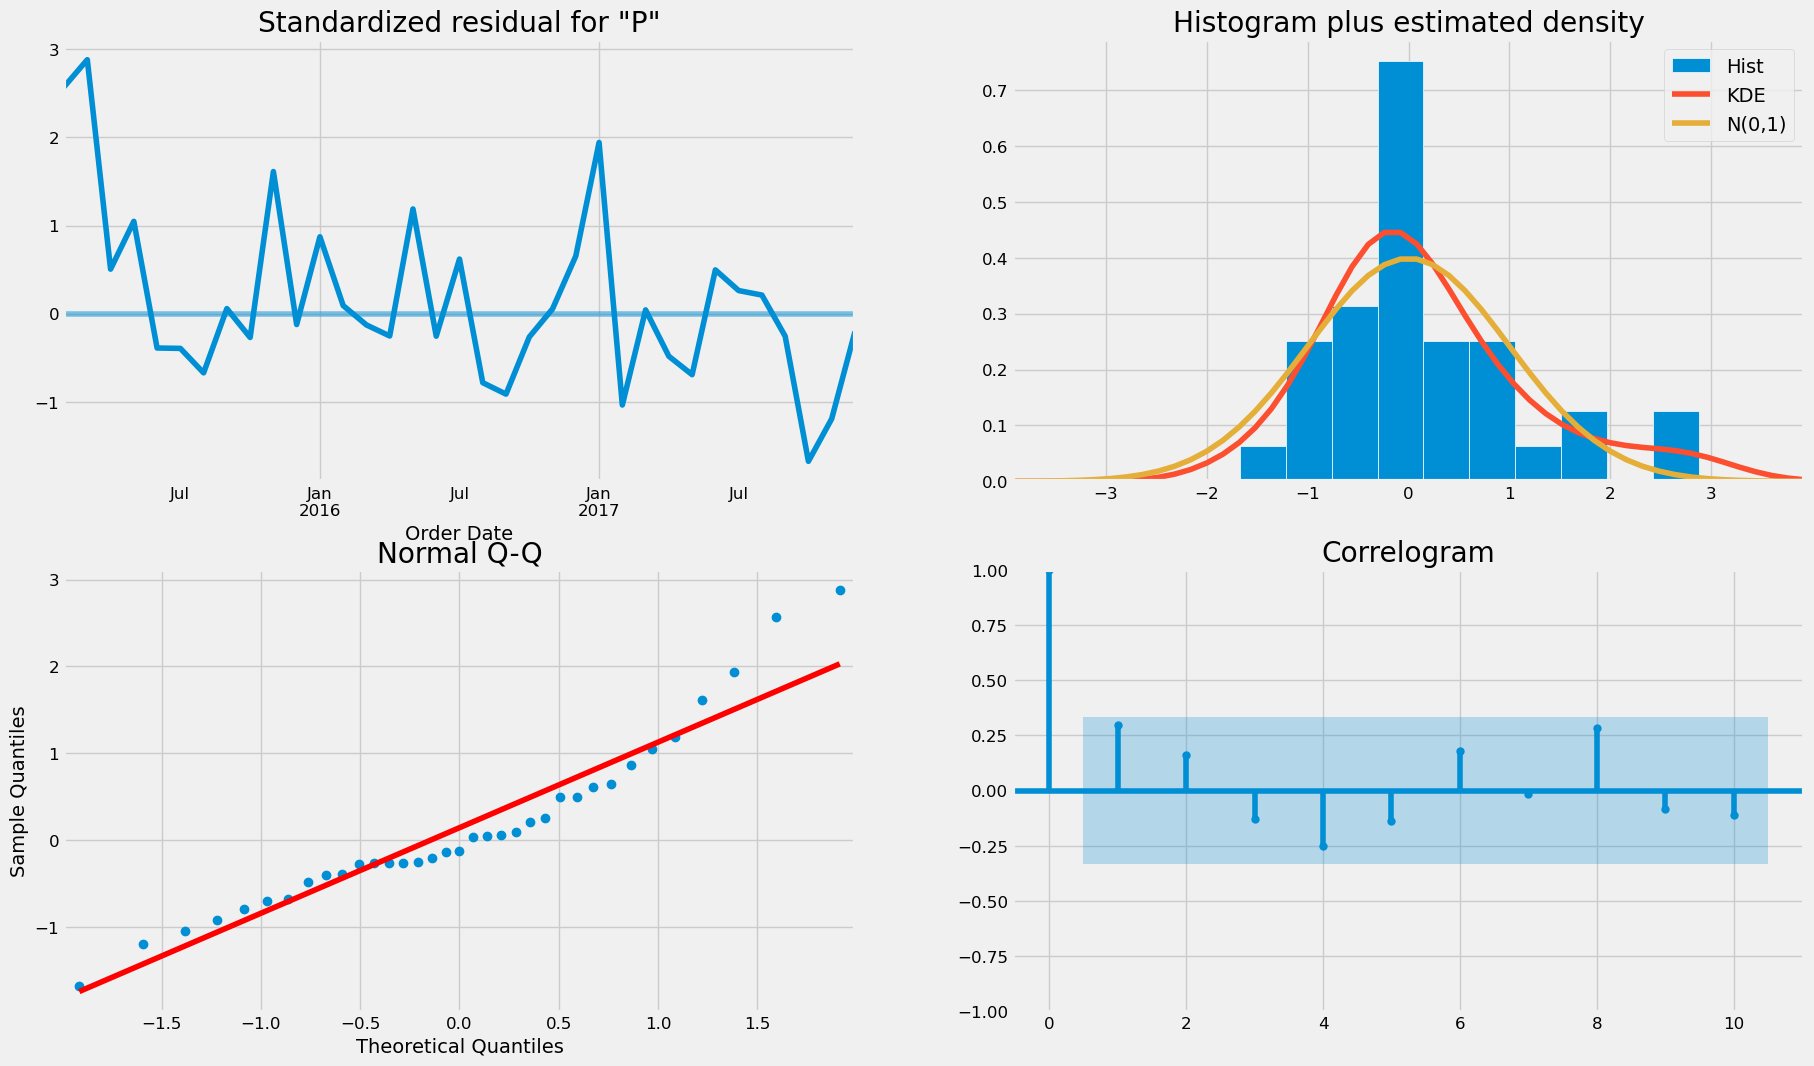

In [63]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

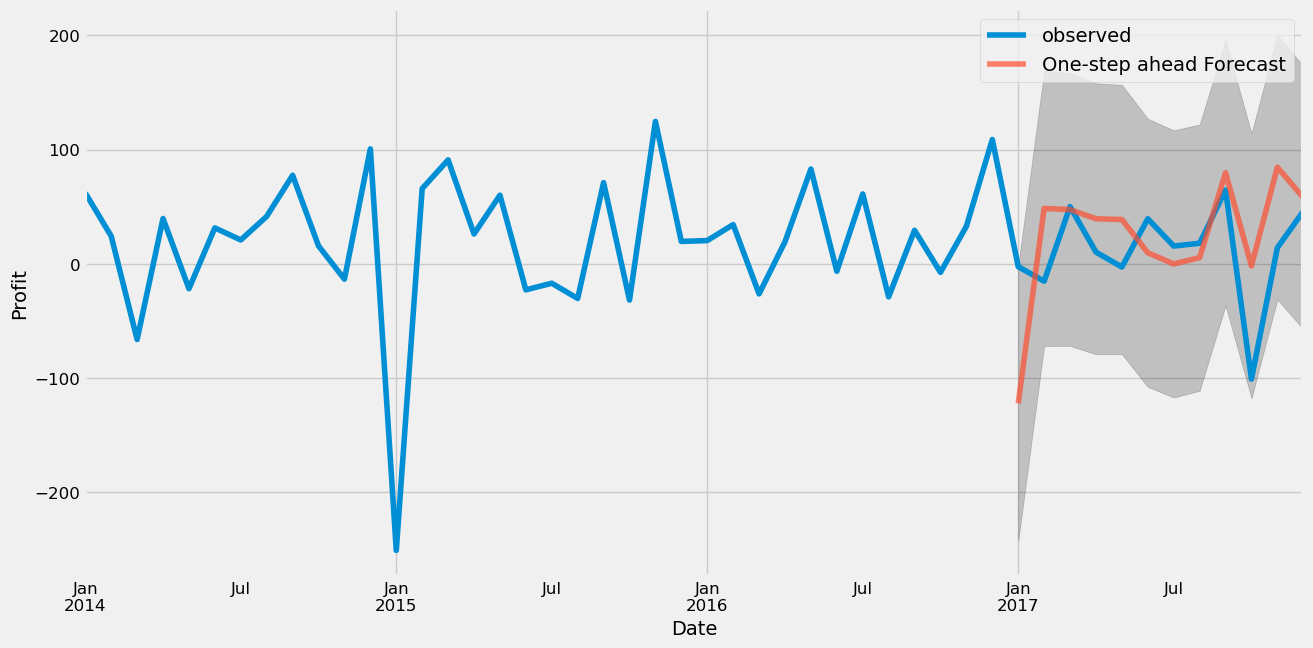

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

In [59]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 9997.4


In [60]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 99.99


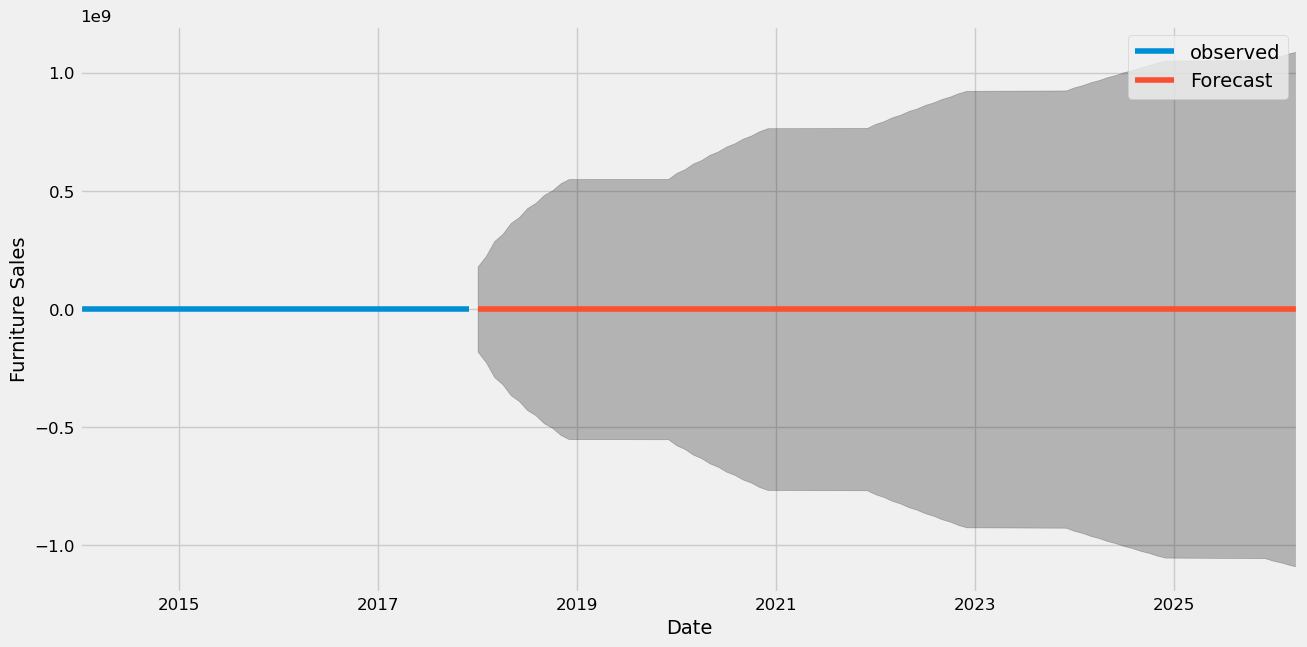

In [61]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()